### Import models and load data

In [1]:
import torch
torch.manual_seed(1234)

from importlib import reload
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import sys

mini_batch_size = 250
nb_runs = 10

### 1channel2images

In [2]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _1channel2images
reload(_1channel2images)
from _1channel2images import *
print("Working with 1channel2images framework, nb_classes = ", nb_classes)

Working with 1channel2images framework, nb_classes =  10


phase: train, epoch: 100, loss: 0.06087, acc: 1.0000
phase: val, epoch: 100, loss: 0.05980, acc: 1.0000
Training complete in 0 min 8 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.06371, acc: 1.0000
phase: val, epoch: 100, loss: 0.06256, acc: 1.0000
Training complete in 0 min 8 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.07081, acc: 1.0000
phase: val, epoch: 100, loss: 0.06947, acc: 1.0000
Training complete in 0 min 11 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.07558, acc: 1.0000
phase: val, epoch: 100, loss: 0.07410, acc: 1.0000
Training complete in 0 min 9 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.06801, acc: 1.0000
phase: val, epoch: 100, loss: 0.06668, acc: 1.0000
Training complete in 0 min 8 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.06748, acc: 1.0000
phase: val, epoch: 100, loss: 0.06613, acc: 1.0000
Training complete in 0 min 10 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.06607, acc: 1.0000
phase: va

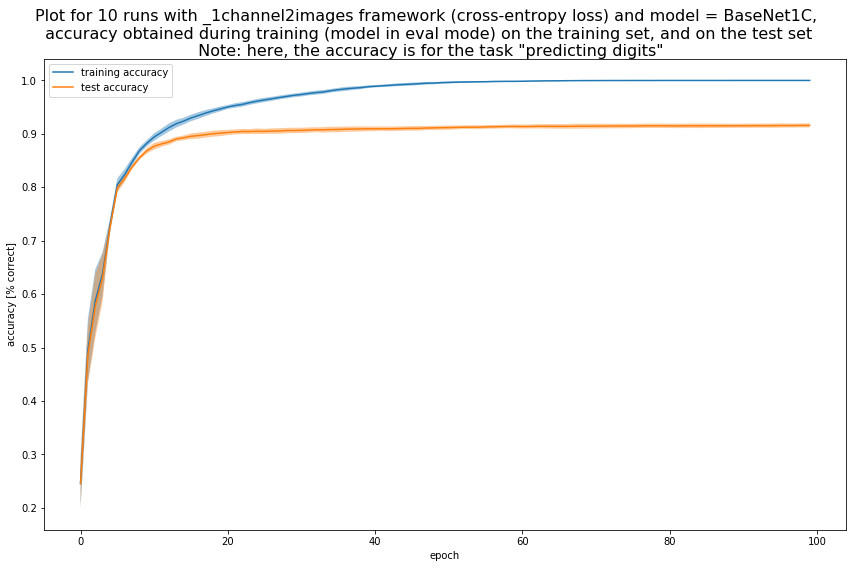

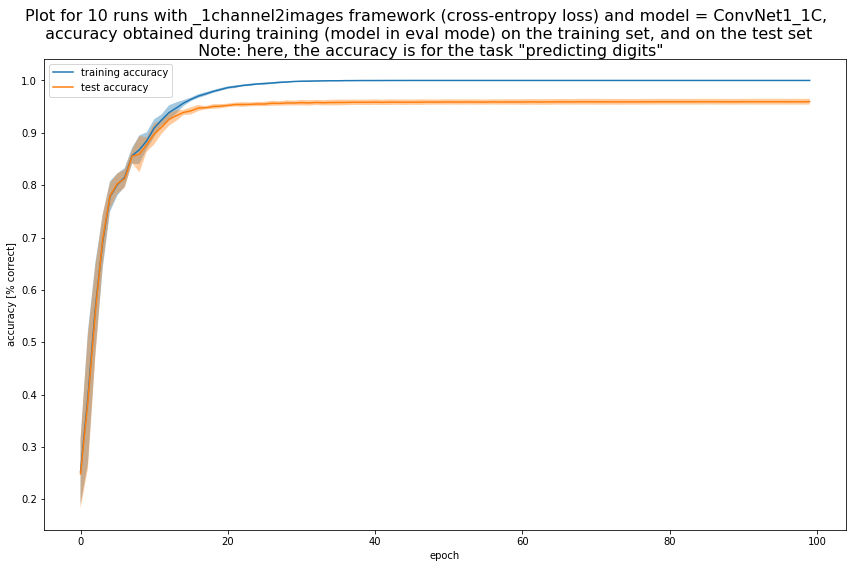

In [3]:
model1C_list = [BaseNet1C(), ConvNet1_1C()]
lr = 0.01
nb_epochs = 25
for model_1C in model1C_list:
    test_results_1C = multiple_training_runs_1C(model_1C, nb_runs, lr, mini_batch_size, nb_epochs, verbose=True)
    write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)
    print("For model {}, mean test_acc = {}".format(model_1C.name, test_results_1C[6]))

In [4]:
import pandas as pd
print(test_results_1C)
write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)
data = pd.read_csv('1channel2images.csv')
data.head()

(90.54346652030945, 4.567733790700149, 1.0, 0.0, 0.95745, 0.004935416226959336, 0.9706000000000001, 0.004273952113286565)
Overwriting file


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean digits accuracy (test set),Std digits accuracy,Mean accuracy (test set),Std accuracy
0,ConvNet1_1C,72226,0.01,100,90.54,1.0,0.0,0.9575,0.0049


### 2channels1image

In [3]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _2channels1image
reload(_2channels1image)
from _2channels1image import *
print("Working with 2channels1image framework, nb_classes = ", nb_classes)

Working with 2channels1image framework, nb_classes =  1


Training complete in 0 min 1 s
Best val acc: 0.9900
Training complete in 0 min 1 s
Best val acc: 0.9990
Training complete in 0 min 2 s
Best val acc: 0.9770
Training complete in 0 min 2 s
Best val acc: 0.9900
Training complete in 0 min 2 s
Best val acc: 0.9900
Training complete in 0 min 2 s
Best val acc: 0.9840
Training complete in 0 min 2 s
Best val acc: 0.9900
Training complete in 0 min 2 s
Best val acc: 0.9980
Training complete in 0 min 2 s
Best val acc: 1.0000
Training complete in 0 min 2 s
Best val acc: 0.9930
For model BaseNet2C, mean test_acc = 0.7948999999999999


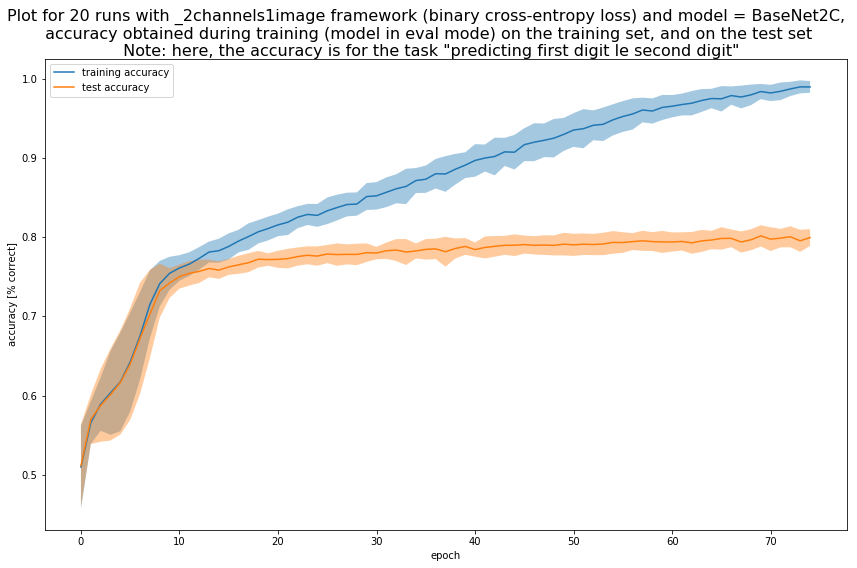

In [64]:
#model2C_list = [BaseNet2C(), ConvNet1_2C(), ConvNet2_2C(), ConvNet4_2C()]
model2C_list = [BaseNet2C()]
nb_epochs_list = [75, 75, 75, 75]
lr = 0.01
for (nb_epochs, model_2C) in zip(nb_epochs_list, model2C_list):
    test_results_2C = multiple_training_runs_fn(model_2C, train_model_2C, test_model_2C, title_2C, nb_runs, lr, 
                                                mini_batch_size, nb_epochs, verbose=False)
    write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)
    print("For model {}, mean test_acc = {}".format(model_2C.name, test_results_2C[4]))

In [52]:
import pandas as pd
print(test_results_2C)
write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)
data = pd.read_csv('2channels1image.csv')
data

(13.805262231826783, 0.44509942982512835, 0.8679, 0.03654662167089533, 0.7838, 0.023408450515904625)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,BaseNet2C,119001,0.01,100,5.84,1.0000,0.0000,0.7983,0.0117
1,ConvNet1_2C,70705,0.01,200,99.83,1.0000,0.0000,0.8264,0.0157
2,ConvNet2_2C,232145,0.01,150,182.37,1.0000,0.0000,0.8364,0.0127
3,BaseNet2C,119001,0.01,75,4.11,1.0000,0.0000,0.7913,0.0155
4,ConvNet1_2C,44905,0.01,75,34.24,1.0000,0.0000,0.8215,0.0119
5,ConvNet2_2C,9209,0.01,75,26.66,0.9917,0.0144,0.8163,0.0078
6,ConvNet3_2C,9209,0.01,75,21.06,0.9941,0.0101,0.8110,0.0112
7,ConvNet4_2C,1447,0.01,75,13.81,0.8679,0.0365,0.7838,0.0234


### Weight Sharing

In [4]:
sys.path.insert(0, "weightssharingModels")
import NetSharing
reload(NetSharing)
from NetSharing import *
import weight_sharing
reload(weight_sharing)
from weight_sharing import *
print("Working with weight_sharing framework")

Working with weight_sharing framework


Training complete in 0 min 51 s
Best val acc: 1.0000
Training complete in 1 min 1 s
Best val acc: 1.0000
Training complete in 1 min 6 s
Best val acc: 1.0000
Training complete in 1 min 3 s
Best val acc: 1.0000
Training complete in 1 min 5 s
Best val acc: 1.0000
Training complete in 1 min 7 s
Best val acc: 1.0000
Training complete in 1 min 7 s
Best val acc: 1.0000
Training complete in 1 min 2 s
Best val acc: 1.0000
Training complete in 1 min 6 s
Best val acc: 1.0000
Training complete in 1 min 4 s
Best val acc: 1.0000
For model NetSharing1, test_acc = 0.8433999999999999
Training complete in 0 min 48 s
Best val acc: 0.9730
Training complete in 0 min 52 s
Best val acc: 0.9750
Training complete in 0 min 50 s
Best val acc: 0.9920
Training complete in 0 min 48 s
Best val acc: 0.9750
Training complete in 0 min 47 s
Best val acc: 0.9730
Training complete in 0 min 47 s
Best val acc: 0.9770
Training complete in 0 min 44 s
Best val acc: 0.9790
Training complete in 0 min 43 s
Best val acc: 0.9800
Tr

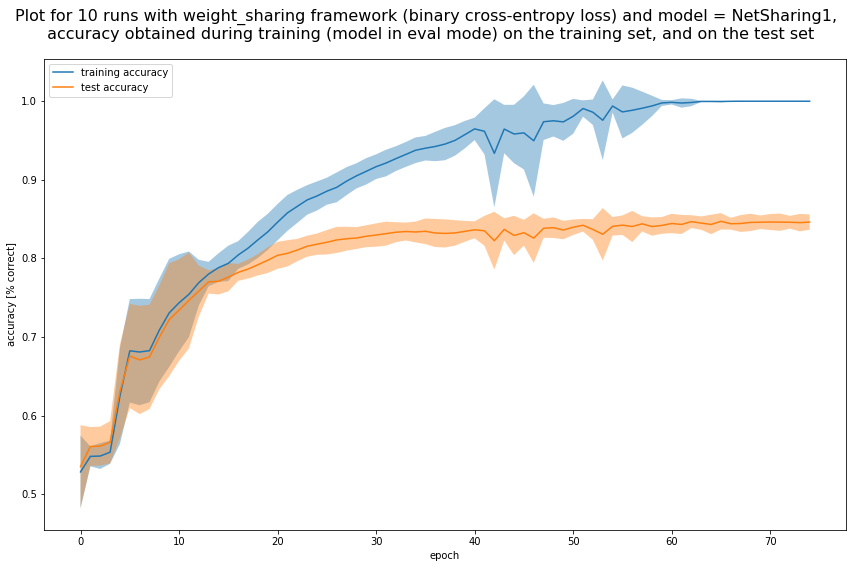

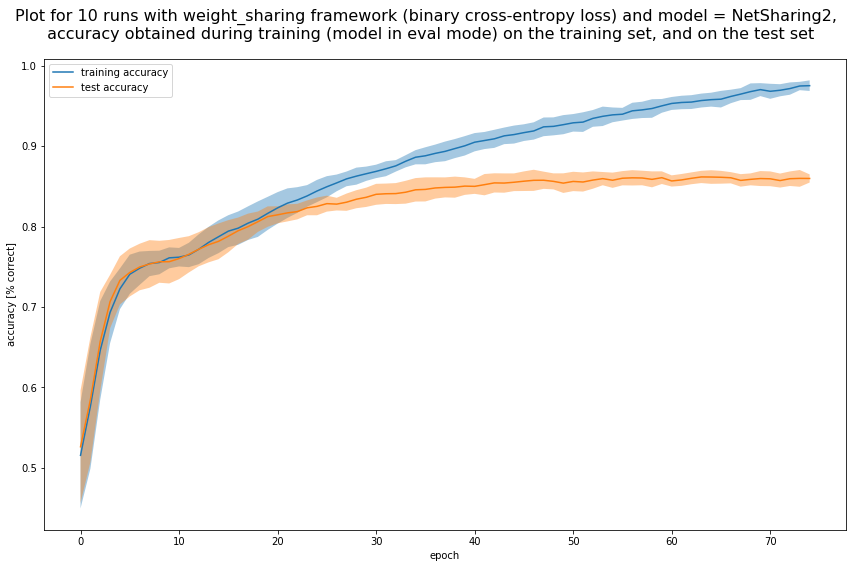

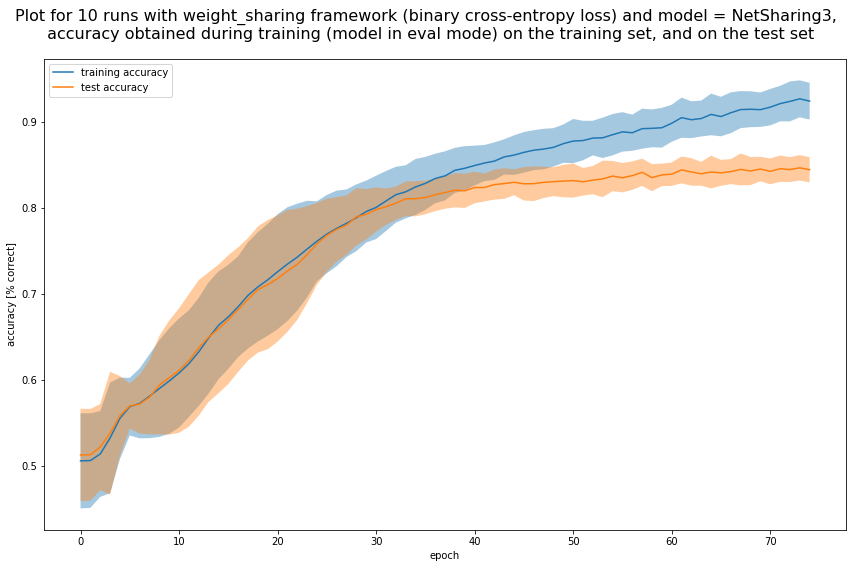

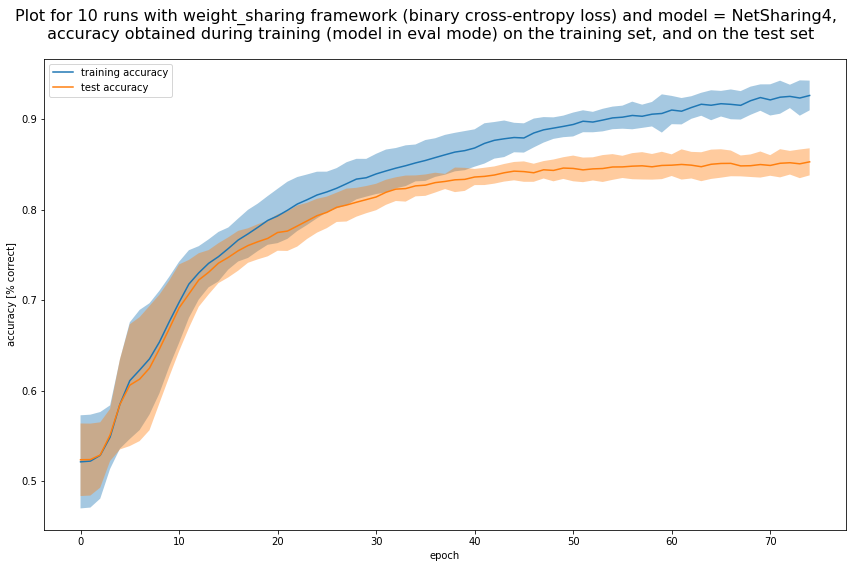

In [34]:
modelws_list = [NetSharing1(), NetSharing2(), NetSharing3(), NetSharing4()]
nb_epochs = 75
for model_ws in modelws_list:
    test_results_ws = multiple_training_runs_fn(model_ws, train_model_ws, test_model_ws, title_ws, nb_runs, lr, 
                                                 mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)
    print("For model {}, mean test_acc = {}".format(model_ws.name, test_results_ws[4]))

In [35]:
import pandas as pd
print(test_results_ws)
write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)
data = pd.read_csv('weightsharing.csv')
data

(21.693117094039916, 1.9475703867106147, 0.9303999999999999, 0.014668181739927913, 0.8486, 0.014001587211614432)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,NetSharing1,70217,0.01,75,63.35,1.0000,0.0000,0.8434,0.0102
1,NetSharing2,9137,0.01,75,46.51,0.9769,0.0060,0.8591,0.0091
2,NetSharing3,1937,0.01,75,32.33,0.9284,0.0217,0.8471,0.0158
3,NetSharing4,1411,0.01,75,21.69,0.9304,0.0147,0.8486,0.0140


### Auxiliary Losses

In [11]:
sys.path.insert(0, "auxiliarylossesModels")
import Incept
reload(Incept)
from Incept import *
import auxiliary_losses
reload(auxiliary_losses)
from auxiliary_losses import *
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
print("Working with auxiliary losses framework")

Working with auxiliary losses framework


Training complete in 0 min 41 s
Best val acc: 1.0000
Training complete in 0 min 51 s
Best val acc: 0.9890
For model Incept1a, test_acc = 0.859
Training complete in 0 min 52 s
Best val acc: 0.9990
Training complete in 0 min 53 s
Best val acc: 1.0000
For model Incept1b, test_acc = 0.879
Training complete in 0 min 36 s
Best val acc: 0.9210
Training complete in 0 min 36 s
Best val acc: 0.8950
For model Incept2, test_acc = 0.8835
phase: train, epoch: 100, loss: 94.75188, acc: 0.5190
phase: val, epoch: 100, loss: 94.74869, acc: 0.5190
Training complete in 1 min 2 s
Best val acc: 0.6320
phase: train, epoch: 100, loss: 0.30821, acc: 0.9750
phase: val, epoch: 100, loss: 0.29653, acc: 0.9780
Training complete in 1 min 8 s
Best val acc: 0.9990
For model Incept3, test_acc = 0.7745
phase: train, epoch: 100, loss: 2.38041, acc: 0.8740
phase: val, epoch: 100, loss: 1.10058, acc: 0.9230
Training complete in 0 min 48 s
Best val acc: 0.9560
phase: train, epoch: 100, loss: 4.11666, acc: 0.8670
phase: val

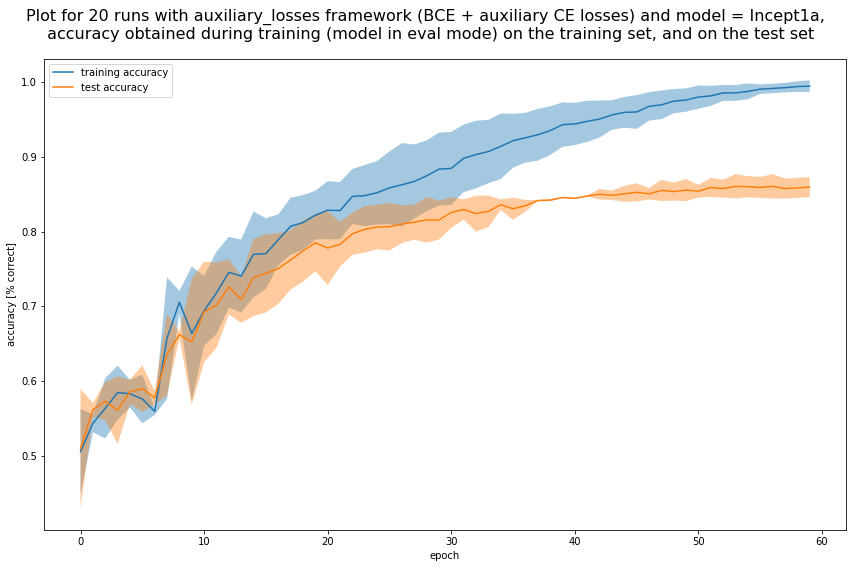

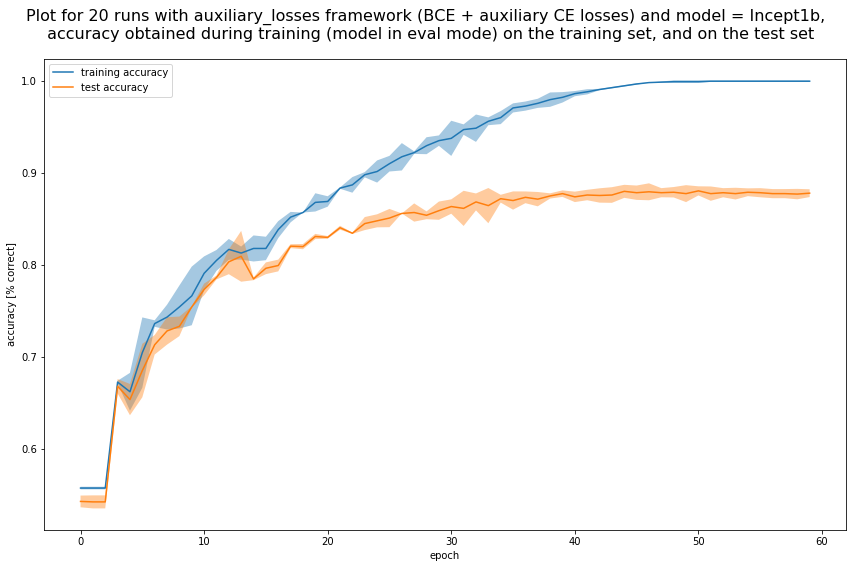

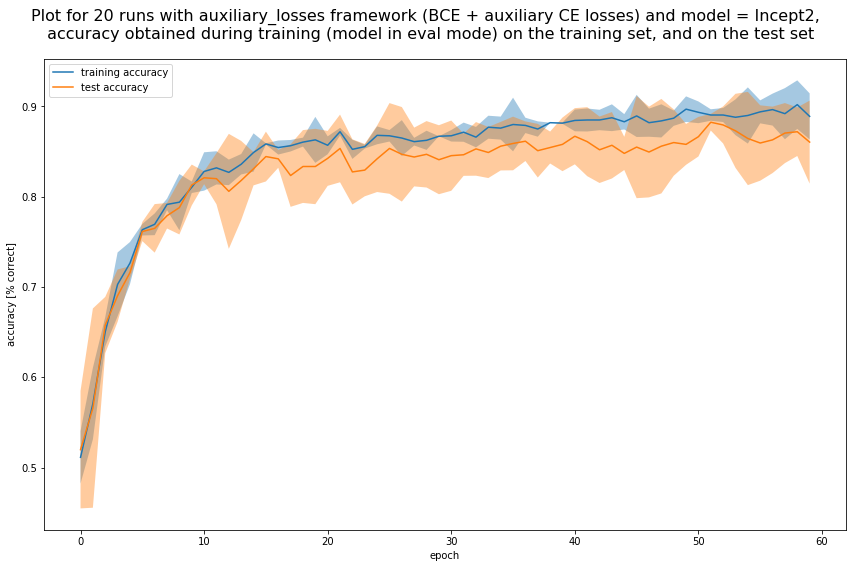

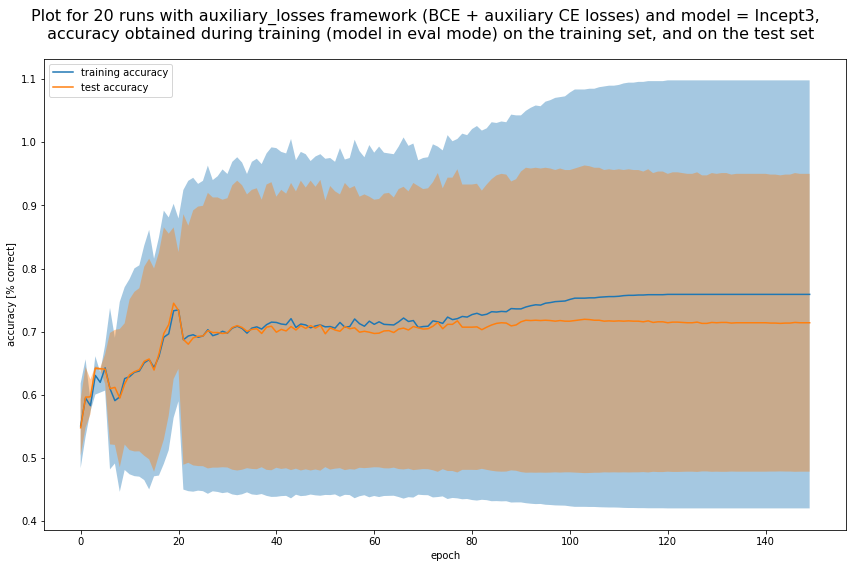

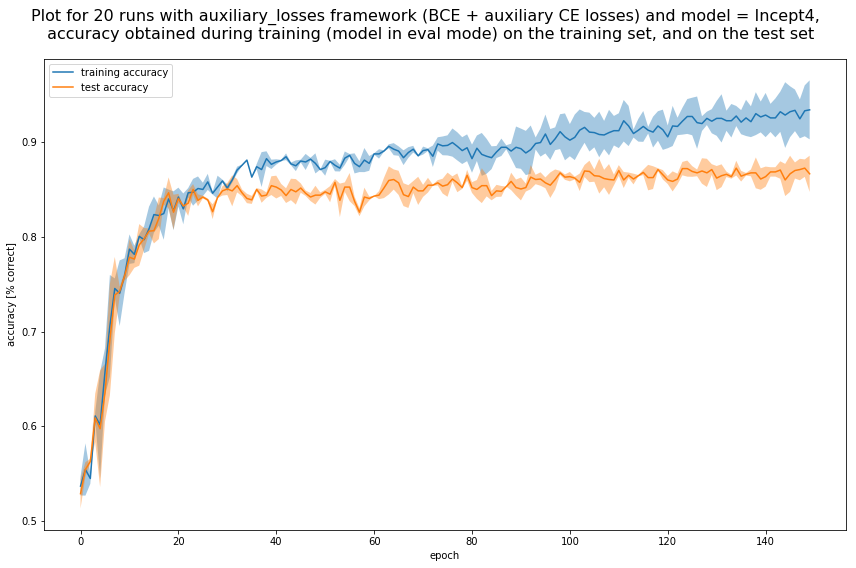

In [12]:
modelaux_list = [Incept1a(), Incept1b(), Incept2(), Incept3(), Incept4()]
#modelaux_list = [Incept3(), Incept4()]
lr=0.01
nb_runs = 2
nb_epochs_list = [60, 60, 60, 200, 200]
for (nb_epochs, model_aux) in zip(nb_epochs_list, modelaux_list):
    test_results_aux = multiple_training_runs_fn(model_aux, train_model_aux, test_model_aux, title_aux, nb_runs, lr,
                                                     mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
    print("For model {}, test_acc = {}".format(model_aux.name, test_results_aux[4]))

In [13]:
import pandas as pd
print(test_results_aux)
write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
data = pd.read_csv('auxiliary_losses.csv')
data

(45.83424401283264, 2.4073922464147297, 0.938, 0.025455844122715655, 0.8685, 0.01626345596729061)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,Incept1a,96927,0.01,60,45.55,0.9945,0.0078,0.8590,0.0127
1,Incept1b,142453,0.01,60,52.53,0.9995,0.0007,0.8790,0.0057
2,Incept2,9547,0.01,60,36.33,0.9080,0.0184,0.8835,0.0106
3,Incept3,3847,0.01,150,65.12,0.8155,0.2595,0.7745,0.1506
4,Incept4,4761,0.01,150,45.83,0.9380,0.0255,0.8685,0.0163
